<h1>Machine Learning Project 1 - PLA</h1>
<p>Joshua John and Liora Wachsstock</p>

<h2> Useful Functions

Generate Data

In [1]:
import random
import time
import pandas as pd

random.seed(time.time())

def generate_data(size, linearly_separable=True, min_dist_btwn_points=0):
    data = [[0 for x in range(2)] for y in range(size)] 
    
    #tracks the number of points in each class
    numPos = 0
    numNeg = 0
    
    # Initialize points and their values
    for i in range(size):

        # Create random data point
        data[i][0] = random.randint(1,100)
        data[i][1] = random.randint(1,100)

        # Create optional distance between classes
        while(abs(data[i][0] - data[i][1]) <= min_dist_btwn_points):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100)
            
        # Make sure there are equal amounts in each class
        while(numPos >= (size / 2) and data[i][0] < data[i][1]):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100) 
        while(numNeg >= (size / 2) and data[i][0] >= data[i][1]):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100)
            
        # Point's position relative to x = y line determines value        
        if (data[i][0] < data[i][1]):
            data[i].append(1)
            numPos += 1
        else:
            data[i].append(-1)
            numNeg += 1

        # Create non-linearly separable data by switching up the value 10% of the time
        if (not linearly_separable and random.randint(1,10) % 10 == 0):
            data[i][2] *= -1
            
    return data

Separate Data

In [2]:
def sep_data(data):
    #separate the points from values for sake of pla
    values=[]
    points=[]
    for i in range(len(data)):
        values.append(data[i][2])
        points.append([1, data[i][0], data[i][1]]) #1 is neeeded as the first component before the points, per PLA
    
    return [points, values]

Plot Data

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_data(data, graph_title, weights=[]):
    
    df = pd.DataFrame(data, columns=("X", "Y", "value"))
    df.plot.scatter(x="X", y="Y", c="value", cmap='viridis', title=graph_title)

    # weights[0] + weights[1]*(x) + weights[2]*(y) = 0
    if weights:
        x = np.array(range(100))
        y = ((-1*weights[0]) - weights[1]*x) / weights[2]
        plt.plot(x, y) 

Order Data Function

In [4]:
def order(data):
    ordered_data = []
    for i in range(len(data)):
        if data[i][2] > 0:
            ordered_data.append(data[i])
            
    for i in range(len(data)):
        if data[i][2] <= 0:
            ordered_data.append(data[i])
            
    return ordered_data

PLA Algorithm

In [5]:
import numpy as np
def num_missclassified_points(w, x, y):
    missed_points = []
    labels_this_run = np.sign(np.dot(x,w)) 
    for i in range(len(x)):
        if labels_this_run[i] != y[i]:
            missed_points.append(i)
    return len(missed_points)

In [6]:
import numpy as np
def pla(x, y, passes, step_size=1, w=[0,0,0]):
    
    num_updates = 0 #keep track of updates
    num_missed_points = len(x) #assume it starts with them all missclassified
    min_error_result = w #keep track of the min error case for non-linearly separable data
    
    for c in range(passes):
        updated = False
        for i in range(len(x)):
            if y[i] * np.dot(w, x[i]) <= 0:
                update = [step_size * y[i] * point for point in x[i]]
                w = [sum(i) for i in zip(*[w,update])] #returns a vector of the sums of corresponding values in each vector (w and update) 
                
                updated = True
                num_updates += 1
                
                #check for the number of misclassified points and keep track of the min error
                if num_missclassified_points(w, x, y) < num_missed_points:
                    num_missed_points = num_missclassified_points(w, x, y)
                    min_error_result = w
        
        if not updated:
            break
    
    if not updated:
        print("First solution found: " , w)
    else:
        print("No perfect solution found, best solution found is ", min_error_result)
        w = min_error_result #return best solution found
    
    result = {}
    result['w'] = w
    result['updates'] = num_updates
    result['iterations'] = c + 1
    return result
                    

Print Data Functions

In [7]:
def accuracy(weights, data):
    points = sep_data(data)[0]
    values = sep_data(data)[1]
    return (float(num_missclassified_points(weights, points, values)) / len(data)) * 100

In [8]:
def line_string(weights):
    return 'y = ('+ str(-weights[0]) + ' + ' + str(-weights[1]) + 'x)/' + str(weights[2])

In [35]:
def print_stats(train_ls, test_ls, weights, step, final_weights, total_updates, iterations, train_accuracy, test_accuracy):
    print('1. We generated the points using the python library random.randint() for both x and y coordinates,')
    print('   which has a discrete uniform random distribution.')
    print('    (https://docs.python.org/3/library/random.html)')
    print('2. Linearly separable training data :', train_ls)
    print('3. Linearly separable test data:', test_ls)
    print('4. Initial learning weights:', weights, 'and step size constant:', step)
    print('5.', line_string(final_weights))
    print('6. Total times the weights were updated:', total_updates)
    print('7. Total iterations:', iterations)
    print('8. Final missclassification error on training data: ' + str(train_accuracy) + '%')
    print('   Final missclassification error on test data: '+ str(test_accuracy) + '%')


<h3> Generate Test Data:

In [10]:
test_data = generate_data(30, linearly_separable=False)
test_points=sep_data(test_data)[0]
test_values=sep_data(test_data)[1]

<h2><u>Linearly Separable Data Set

<h3>Generate Training Data:

In [11]:
tr_data_ls = generate_data(50)

#separate for sake of PLA
tr_points = sep_data(tr_data_ls)[0]
tr_values = sep_data(tr_data_ls)[1]

<h4>Base case (w = [0,0,0], step_size = 1, ordered = false):

First solution found:  [-3, -243, 242]
1. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a discrete uniform random distribution.
    (https://docs.python.org/3/library/random.html)
2. Linearly separable training data : True
3. Linearly separable test data: False
4. Initial learning weights: [0, 0, 0] and step size constant: 1
5. y = (3 + 243x)/242
6. Total times the weights were updated: 27
7. Total iterations: 6
8. Final missclassification error on training data: 0.0%
   Final missclassification error on test data: 6.666666666666667%


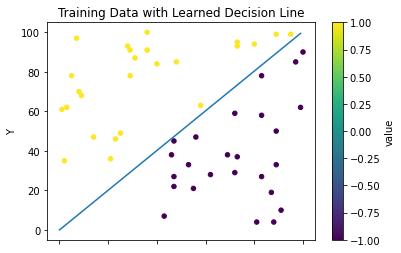

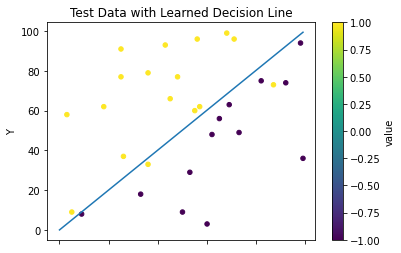

In [36]:
#Variables
passes = 100
step_size = 1
w = [0,0,0]

#Run PLA on training Data
result = pla(tr_points, tr_values, passes, step_size, w)

#Plot Training data with Learned Decision Line
plot_data(tr_data_ls, 'Training Data with Learned Decision Line', result['w'])

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result['w'])

#Print stats
print_stats(True, False, w, step_size, result['w'], result['updates'], result['iterations'], \
            accuracy(result['w'], tr_data_ls), accuracy(result['w'], test_data))

#save result
base_case = result['w']

<h4>Case I. where w = [1,2,3] step_size = 1, prdered = false

First solution found:  [-1, -200, 193]
1. We followed the above algorithm to generate data points
2. Linearly separable training data : True
3. Linearly separable test data: False
4. Initial learning weights: [1, 2, 3] and step size constant: 1
5. y = (1 + 200x)/193
6. Total times the weights were updated: 18
7. Total iterations: 4
8. Final missclassification error on training data: 0.0%
   Final missclassification error on test data: 6.666666666666667%


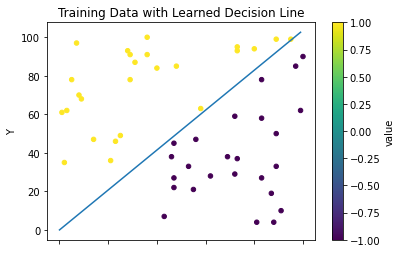

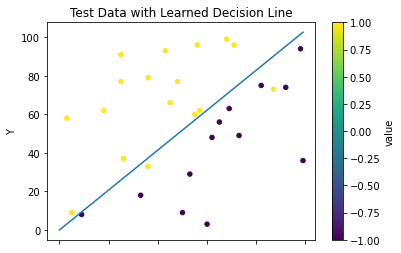

In [13]:
#Variables
passes = 100
step_size = 1
w = [1,2,3]

#Run PLA on training Data
result = pla(tr_points, tr_values, passes, step_size, w)

#Plot Training data with Learned Decision Line
plot_data(tr_data_ls, 'Training Data with Learned Decision Line', result['w'])

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result['w'])

# Print stats
print_stats(True, False, w, step_size, result['w'], result['updates'], result['iterations'], accuracy(result['w'], tr_data_ls), accuracy(result['w'], test_data))

# Save result 
case_I = result['w']

<h4> Case II. where w = [0,0,0] step_size = 2, ordered = false

First solution found:  [-6, -486, 484]
1. We followed the above algorithm to generate data points
2. Linearly separable training data : True
3. Linearly separable test data: False
4. Initial learning weights: [0, 0, 0] and step size constant: 2
5. y = (6 + 486x)/484
6. Total times the weights were updated: 27
7. Total iterations: 6
8. Final missclassification error on training data: 0.0%
   Final missclassification error on test data: 6.666666666666667%


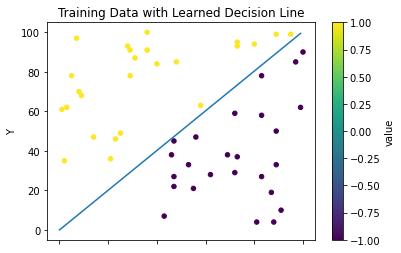

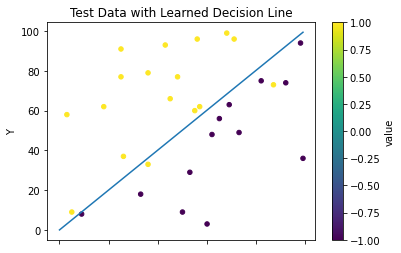

In [14]:
#Variables
passes = 100
step_size = 2
w = [0,0,0]

#Run PLA on training Data
result = pla(tr_points, tr_values, passes, step_size, w)

#Plot Training data with Learned Decision Line
plot_data(tr_data_ls, 'Training Data with Learned Decision Line', result['w'])

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result['w'])

#Get accuracy
accuracy_train = accuracy(result['w'], tr_data_ls)
accuracy_test =  accuracy(result['w'], test_data)

#Print Stats
print_stats(True, False, w, step_size, result['w'], result['updates'], result['iterations'], accuracy_train, accuracy_test)

# Save Result 
case_II = result['w']

<h4>Case III. where w = [0,0,0] step_size = 1, ordered = True

First solution found:  [-4, -282, 287]
1. We followed the above algorithm to generate data points
2. Linearly separable training data : True
3. Linearly separable test data: False
4. Initial learning weights: [0, 0, 0] and step size constant: 1
5. y = (4 + 282x)/287
6. Total times the weights were updated: 26
7. Total iterations: 11
8. Final missclassification error on training data: 0.0%
   Final missclassification error on test data: 6.666666666666667%


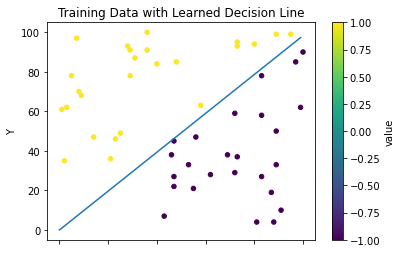

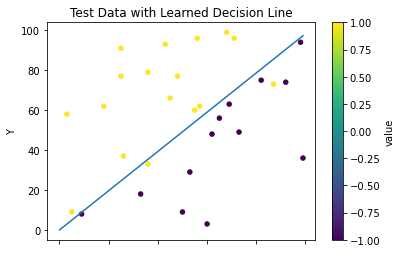

In [15]:
#Variables
passes = 100
step_size = 1
w = [0,0,0]

#example
ordered_training_data_ls = order(tr_data_ls)

#separate for sake of PLA
ordered_points = sep_data(ordered_training_data_ls)[0]
ordered_values = sep_data(ordered_training_data_ls)[1]

#Run PLA on training Data
result = pla(ordered_points, ordered_values, passes, step_size, w)

#Plot Training data with Learned Decision Line
plot_data(ordered_training_data_ls, 'Training Data with Learned Decision Line', result['w'])

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result['w'])

#print stats
print_stats(True, False, w, step_size, result['w'], result['updates'], result['iterations'], accuracy(result['w'], tr_data_ls), accuracy(result['w'], test_data))

#save result
case_III = result['w']


In [16]:
print("Conclusions:")
print("Base case used w = [0,0,0], step_size constant = 1, and points were kept in their random order.")
print("The resulting line was", line_string(base_case))
print('')
print("I. w = [1,2,3], step_size = 1, and the points were kept in their random order:") 
print("   Resulting line:", line_string(case_I))
print("   Compared to base case result:", line_string(base_case))
print('')
print("II. w = [0,0,0], step_size = 2, and the points were kept in their random order:") 
print("   Resulting line:", line_string(case_II))
print("   Compared to base case result:", line_string(base_case))
print('')
print("III. w = [0,0,0], step_size = 1, and the points were grouped according to class (PLA dealt with one and then the other):") 
print("   Resulting line:", line_string(case_III))
print("   Compared to base case result:", line_string(base_case))



Conclusions:
Base case used w = [0,0,0], step_size constant = 1, and points were kept in their random order.
The resulting line was y = (3 + 243x)/242

I. w = [1,2,3], step_size = 1, and the points were kept in their random order:
   Resulting line: y = (1 + 200x)/193
   Compared to base case result: y = (3 + 243x)/242

II. w = [0,0,0], step_size = 2, and the points were kept in their random order:
   Resulting line: y = (6 + 486x)/484
   Compared to base case result: y = (3 + 243x)/242

III. w = [0,0,0], step_size = 1, and the points were grouped according to class (PLA dealt with one and then the other):
   Resulting line: y = (4 + 282x)/287
   Compared to base case result: y = (3 + 243x)/242


<h2><u>Non-Linearly Separable Dataset

<h3>Generate Training Data:

In [17]:
tr_data_nls = generate_data(50, linearly_separable=False)

#separate for sake of PLA
tr_points_nls = sep_data(tr_data_nls)[0]
tr_values_nls = sep_data(tr_data_nls)[1]

<h4>Base case (w = [0,0,0], step_size = 1, ordered = false):

No perfect solution found, best solution found is  [1, -64, 63]
1. We followed the above algorithm to generate data points
2. Linearly separable training data : False
3. Linearly separable test data: False
4. Initial learning weights: [0, 0, 0] and step size constant: 1
5. y = (-1 + 64x)/63
6. Total times the weights were updated: 1336
7. Total iterations: 100
8. Final missclassification error on training data: 12.0%
   Final missclassification error on test data: 6.666666666666667%


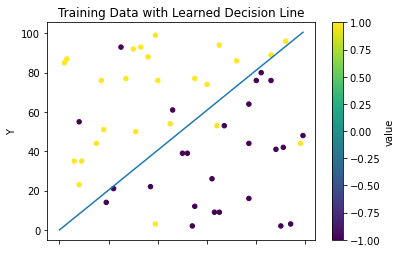

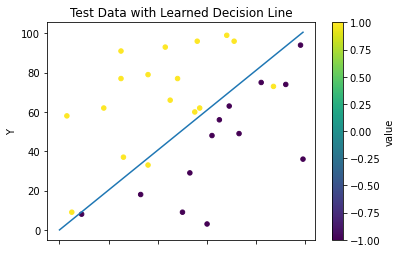

In [18]:
#Variables
passes = 100
step_size = 1
w = [0,0,0]

#Run PLA on training Data
result = pla(tr_points_nls, tr_values_nls, passes, step_size, w)

#Plot Training data with Learned Decision Line
plot_data(tr_data_nls, 'Training Data with Learned Decision Line', result['w'])

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result['w'])

# Print Stats
print_stats(False, False, w, step_size, result['w'], result['updates'], result['iterations'], accuracy(result['w'], tr_data_nls), accuracy(result['w'], test_data))

#save result
base_case = result['w']

<h4>Case I. where w = [1,2,3], step_size = 1, ordered = False

No perfect solution found, best solution found is  [2, -40, 39]


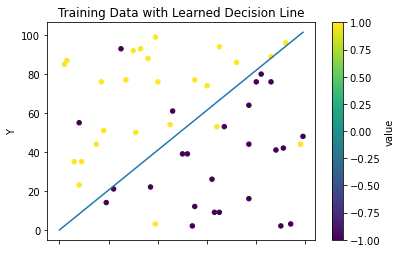

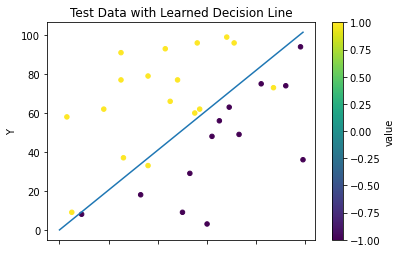

In [19]:
#Variables
passes = 100
step_size = 1
w = [1,2,3]

#Run PLA on training Data
result = pla(tr_points_nls, tr_values_nls, passes, step_size, w)

#Plot Training data with Learned Decision Line
plot_data(tr_data_nls, 'Training Data with Learned Decision Line', result['w'])

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result['w'])

#Print stats
#print_stats(False, False, w, step_size, result['w'], result['updates'], result['iterations'], accuracy(result['w'], tr_data_nls), accuracy(result['w'], test_data))

#save result
case_I = result['w']

<h4> Case II. where w = [0,0,0] step_size = 2, ordered = False

No perfect solution found, best solution found is  [2, -128, 126]


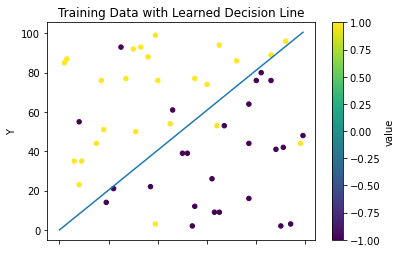

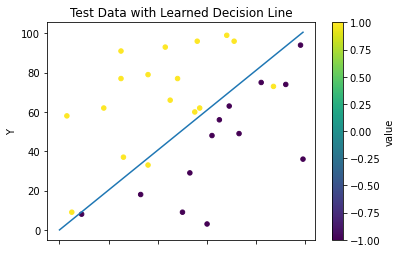

In [20]:
#Variables
passes = 100
step_size = 2
w = [0,0,0]

#Run PLA on training Data
result = pla(tr_points_nls, tr_values_nls, passes, step_size, w)

#Plot Training data with Learned Decision Line
plot_data(tr_data_nls, 'Training Data with Learned Decision Line', result['w'])

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result['w'])

# Print stats
#print_stats(False, False, w, step_size, result['w'], result['updates'], result['iterations'], accuracy(result['w'], tr_data_nls), accuracy(result['w'], test_data))

#save result
case_II = result['w']

<h4> Case III. where w = [0,0,0] step_size = 1, ordered = True

No perfect solution found, best solution found is  [3, -51, 51]


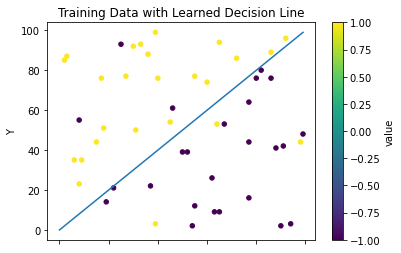

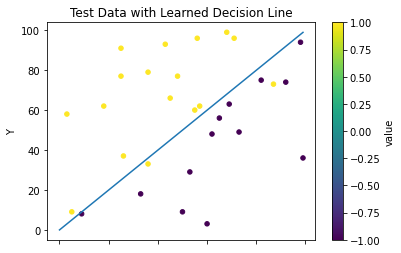

In [21]:
#Variables
passes = 100
step_size = 1
w = [0,0,0]

#example
ordered_training_data_nls = order(tr_data_nls)

#separate for sake of PLA
ordered_points_nls = sep_data(ordered_training_data_nls)[0]
ordered_values_nls = sep_data(ordered_training_data_nls)[1]

#Run PLA on training Data
result = pla(ordered_points_nls, ordered_values_nls, passes, step_size, w)

#Plot Training data with Learned Decision Line
plot_data(ordered_training_data_nls, 'Training Data with Learned Decision Line', result['w'])

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result['w'])

#Print stats
#print_stats(False, False, w, step_size, result['w'], result['updates'], result['iterations'], accuracy(result['w'],tr_data_nls), accuracy(result['w'], test_data))

#save result 

case_III = result['w']


In [22]:
print("Conclusions:")
print("Base case used w = [0,0,0], step_size constant = 1, and points were kept in their random order.")
print("The resulting line was", line_string(base_case))
print('')
print("I. w = [1,2,3], step_size = 1, and the points were kept in their random order:") 
print("   Resulting line:", line_string(case_I))
print("   Compared to base case result:", line_string(base_case))
print('')
print("II. w = [0,0,0], step_size = 2, and the points were kept in their random order:") 
print("   Resulting line:", line_string(case_II))
print("   Compared to base case result:", line_string(base_case))
print('')
print("III. w = [0,0,0], step_size = 1, and the points were grouped according to class (PLA dealt with one and then the other):") 
print("   Resulting line:", line_string(case_III))
print("   Compared to base case result:", line_string(base_case))

Conclusions:
Base case used w = [0,0,0], step_size constant = 1, and points were kept in their random order.
The resulting line was y = (-1 + 64x)/63

I. w = [1,2,3], step_size = 1, and the points were kept in their random order:
   Resulting line: y = (-2 + 40x)/39
   Compared to base case result: y = (-1 + 64x)/63

II. w = [0,0,0], step_size = 2, and the points were kept in their random order:
   Resulting line: y = (-2 + 128x)/126
   Compared to base case result: y = (-1 + 64x)/63

III. w = [0,0,0], step_size = 1, and the points were grouped according to class (PLA dealt with one and then the other):
   Resulting line: y = (-3 + 51x)/51
   Compared to base case result: y = (-1 + 64x)/63
